# Задание 1 (5 баллов)

Напишите классы **Chat**, **Message** и **User**. Они должны соответствовать следующим требованиям:

**Chat**:
+ Должен иметь атрибут `chat_history`, где будут храниться все сообщения (`Message`) в обратном хронологическом порядке (сначала новые, затем старые)
+ Должен иметь метод `show_last_message`, выводящий на экран информацию о последнем сообщении
+ Должен иметь метод `get_history_from_time_period`, который принимает два опциональных аргумента (даты с которой и по какую мы ищем сообщения и выдаём их). Метод также должен возвращать объект типа `Chat`
+ Должен иметь метод `show_chat`, выводящий на экран все сообщения (каждое сообщение в таком же виде как и `show_last_message`, но с разделителем между ними)
+ Должен иметь метод `recieve`, который будет принимать сообщение и добавлять его в чат

**Message**:
+ Должен иметь три обязательных атрибута
    + `text` - текст сообщения
    + `datetime` - дата и время сообщения (встроенный модуль datetime вам в помощь). Важно! Это должна быть не дата создания сообщения, а дата его попадания в чат! 
    + `user` - информация о пользователе, который оставил сообщение (какой тип данных использовать здесь, разберётесь сами)
+ Должен иметь метод `show`, который печатает или возвращает информацию о сообщении с необходимой информацией (дата, время, юзер, текст)
+ Должен иметь метод `send`, который будет отправлять сообщение в чат

**User**:
+ Класс с информацией о юзере, наполнение для этого класса придумайте сами

Напишите несколько примеров использования кода, которое показывает взаимодействие между объектами.

В тексте задания намерено не указано, какие аргументы должны принимать методы, пускай вам в этом поможет здравый смысл)

В этом задании не стоит флексить всякими продвинутыми штуками, для этого есть последующие

В этом задании можно использовать только модуль `datetime`

In [1]:
import datetime

class User:
    def __init__(self, user):
        self.user = user

class Message(User):
    def __init__(self, user, text):
        self.text = text
        self.user = user
        self.datetime = datetime.datetime.now()

    def show(self):
        #self.datetime = datetime
        print(f"[{self.datetime}] {self.user}: {self.text}")
    
    def send(self):
        return (f"[{self.datetime}] {self.user}: {self.text}")

class Chat(Message):
    def __init__(self, chat_history):
        self.chat_history = chat_history
        self.datetime_history = []

    def recieve(self, message):
        self.chat_history.insert(0, message)

    def show_last_message(self):
         print(self.chat_history[0])

# get_history_from_time_period я не реализовала :(

    def show_chat(self):
        for message in self.chat_history:
            print(message)

In [2]:
empty_chat_history = []
chat = Chat(empty_chat_history)
user1 = User('Scott')
user2 = User('Ramona')

In [3]:
message1 = Message(user2.user, 'What kind of tea do you want?')
send_message1 = message1.send()
chat.recieve(send_message1)
message1.show()

[2023-02-24 00:23:30.202042] Ramona: What kind of tea do you want?


In [4]:
message2 = Message(user1.user, "There's more than one kind?")
send_message2 = message2.send()
chat.recieve(send_message2)
message2.show()

[2023-02-24 00:23:31.688888] Scott: There's more than one kind?


In [5]:
message3 = Message(user2.user, """We have blueberry, raspberry, ginseng, sleepy time, green tea,
green tea with lemon, green tea with lemon and honey, liver disaster, ginger with
honey, ginger without honey, vanilla almond, white truffel, blueberry chamomile, 
vanilla walnut, constant comment and... earl grey.""")
send_message3 = message3.send()
chat.recieve(send_message3)
message3.show()

[2023-02-24 00:23:33.377154] Ramona: We have blueberry, raspberry, ginseng, sleepy time, green tea,
green tea with lemon, green tea with lemon and honey, liver disaster, ginger with
honey, ginger without honey, vanilla almond, white truffel, blueberry chamomile, 
vanilla walnut, constant comment and... earl grey.


In [6]:
message4 = Message(user1.user, "Did you make some of those up?")
send_message4 = message4.send()
chat.recieve(send_message4)
message4.show()

[2023-02-24 00:23:35.590452] Scott: Did you make some of those up?


In [7]:
chat.show_chat()

[2023-02-24 00:23:35.590452] Scott: Did you make some of those up?
[2023-02-24 00:23:33.377154] Ramona: We have blueberry, raspberry, ginseng, sleepy time, green tea,
green tea with lemon, green tea with lemon and honey, liver disaster, ginger with
honey, ginger without honey, vanilla almond, white truffel, blueberry chamomile, 
vanilla walnut, constant comment and... earl grey.
[2023-02-24 00:23:31.688888] Scott: There's more than one kind?
[2023-02-24 00:23:30.202042] Ramona: What kind of tea do you want?


In [8]:
chat.show_last_message()

[2023-02-24 00:23:35.590452] Scott: Did you make some of those up?


# Задание 2 (3 балла)

В питоне как-то слишком типично и неинтересно происходят вызовы функций. Напишите класс `Args`, который будет хранить в себе аргументы, а функции можно будет вызывать при помощи следующего синтаксиса.

Использовать любые модули **нельзя**, да и вряд-ли это как-то поможет)

In [237]:
class Args:
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs

    def __rlshift__(self, f):
        return f(*self.args, **self.kwargs)

In [238]:
sum << Args([1, 2])

3

In [239]:
(lambda a, b, c: a**2 + b + c) << Args(1, 2, c=50)

53

# Задание 3 (5 баллов)

Сделайте класс наследник `float`. Он должен вести себя как `float`, но также должен обладать некоторыми особенностями:
+ При получении атрибутов формата `<действие>_<число>` мы получаем результат такого действия над нашим числом
+ Создавать данные атрибуты в явном виде, очевидно, не стоит

Подсказка: если в процессе гуглёжки, вы выйдете на такую тему как **"Дескрипторы", то это НЕ то, что вам сейчас нужно**

Примеры использования ниже

In [78]:
class StrangeFloat(float):
    def __getattr__(self, attr):
        if "_" in attr:
            action, number = attr.split("_")
            if action == "add":
                return StrangeFloat(self.__add__(float(number)))
            elif action == "subtract":
                return StrangeFloat(self.__sub__(float(number)))
            elif action == "multiply":
                return StrangeFloat(self.__mul__(float(number)))
            elif action == "divide":
                return StrangeFloat(self.__truediv__(float(number)))
        raise AttributeError(f"'{type(self).__attr__}' object has no attribute '{attr}'")


In [79]:
number = StrangeFloat(3.5)

In [80]:
number.add_1

4.5

In [81]:
number.subtract_20

-16.5

In [82]:
number.multiply_5

17.5

In [83]:
number.divide_25

0.14

In [84]:
number.add_1.add_2.multiply_6.divide_8.subtract_9

-4.125

In [85]:
getattr(number, "add_-2.5")   # Используем getattr, так как не можем написать number.add_-2.5 - это SyntaxError

1.0

In [86]:
number + 8   # Стандартные для float операции работают также

11.5

In [87]:
number.as_integer_ratio()   # Стандартные для float операции работают также  (это встроенный метод float, писать его НЕ НАДО)

(7, 2)

# Задание 4 (3 балла)

В данном задании мы немного отдохнём и повеселимся. От вас требуется заменить в данном коде максимально возможное количество синтаксических конструкций на вызовы dunder методов, dunder атрибутов и dunder переменных.

Маленькая заметка: полностью всё заменить невозможно. Например, `function()` можно записать как `function.__call__()`, но при этом мы всё ещё не избавляемся от скобочек, так что можно делать так до бесконечности `function.__call__.__call__.__call__.__call__.....__call__()` и при всём при этом мы ещё не избавляемся от `.` для доступа к атрибутам. В общем, замените всё, что получится, не закапываясь в повторы, как в приведённом примере. Чем больше разных методов вы найдёте и используете, тем лучше и тем выше будет балл

Код по итогу дожен работать и печатать число **4420.0**, как в примере. Структуру кода менять нельзя, просто изменяем конструкции на синонимичные

И ещё маленькая подсказка. Заменить здесь можно всё кроме:
+ Конструкции `for ... in ...`:
+ Синтаксиса создания лямбда функции
+ Оператора присваивания `=`
+ Конструкции `if-else`

In [89]:
import numpy as np


matrix = []
for idx in range(0, 100, 10):
    matrix += [list(range(idx, idx + 10))]
    
selected_columns_indices = list(filter(lambda x: x in range(1, 5, 2), range(len(matrix))))
selected_columns = map(lambda x: [x[col] for col in selected_columns_indices], matrix)

arr = np.array(list(selected_columns))

mask = arr[:, 1] % 3 == 0
new_arr = arr[mask]

product = new_arr @ new_arr.T

if (product[0] < 1000).all() and (product[2] > 1000).any():
    print(product.mean())

4420.0


In [367]:
# Ваш код здесь
import numpy as np


matrix = []
for idx in range(0, 100, 10):
    matrix.__iadd__([list(range(idx, idx.__add__(10)))])
    
selected_columns_indices = list(filter(lambda x: x in range(1, 5, 2), range(matrix.__len__())))
selected_columns = map(lambda x: [x[col] for col in selected_columns_indices], matrix)

arr = np.array(list(selected_columns))

mask = arr[:, 1].__mod__(3).__eq__(0)
new_arr = arr[mask]

product = new_arr @ new_arr.T

#additional code for finding the average value of a matrix
sum_arr = np.zeros(product.shape[1])
full_sum = 0

for row in product:
    sum_arr.__iadd__(row)

for elem in sum_arr:
    full_sum += elem #here the replacement leads to an error

if (product[0].__lt__(1000)).all().__and__((product[2].__gt__(1000)).any()):
    print((full_sum).__truediv__(product.__len__().__mul__(product[0].__len__())))

4420.0


# Задание 5 (10 баллов)

Напишите абстрактный класс `BiologicalSequence`, который задаёт следующий интерфейс:
+ Работа с функцией `len`
+ Возможность получать элементы по индексу и делать срезы последовательности (аналогично строкам)
+ Вывод на печать в удобном виде и возможность конвертации в строку
+ Возможность проверить алфавит последовательности на корректность

Напишите класс `NucleicAcidSequence`:
+ Данный класс реализует интерфейс `BiologicalSequence`
+ Данный класс имеет новый метод `complement`, возвращающий комплементарную последовательность
+ Данный класс имеет новый метод `gc_content`, возвращающий GC-состав (без разницы, в процентах или в долях)

Напишите классы наследники `NucleicAcidSequence`: `DNASequence` и `RNASequence`
+ `DNASequence` должен иметь метод `transcribe`, возвращающий транскрибированную РНК-последовательность
+ Данные классы не должны иметь <ins>публичных методов</ins> `complement` и метода для проверки алфавита, так как они уже должны быть реализованы в `NucleicAcidSequence`.

Напишите класс `AminoAcidSequence`:
+ Данный класс реализует интерфейс `BiologicalSequence`
+ Добавьте этому классу один любой метод, подходящий по смыслу к аминокислотной последовательности. Например, метод для нахождения изоэлектрической точки, молекулярного веса и т.д.

Комментарий по поводу метода `NucleicAcidSequence.complement`, так как я хочу, чтобы вы сделали его опредедённым образом:

При вызове `dna.complement()` или условного `dna.check_alphabet()` должны будут вызываться соответствующие методы из `NucleicAcidSequence`. При этом, данный метод должен обладать свойством полиморфизма, иначе говоря, внутри `complement` не надо делать условия а-ля `if seuqence_type == "DNA": return self.complement_dna()`, это крайне не гибко. Данный метод должен опираться на какой-то общий интерфейс между ДНК и РНК. Создание экземпляров `NucleicAcidSequence` не подразумевается, поэтому код `NucleicAcidSequence("ATGC").complement()` не обязан работать, а в идеале должен кидать исключение `NotImplementedError` при вызове от экземпляра `NucleicAcidSequence`

Вся сложность задания в том, чтобы правильно организовать код. Если у вас есть повторяющийся код в сестринских классах или родительском и дочернем, значит вы что-то делаете не так.


Маленькое замечание: По-хорошему, между классом `BiologicalSequence` и классами `NucleicAcidSequence` и `AminoAcidSequence`, ещё должен быть класс-прослойка, частично реализующий интерфейс `BiologicalSequence`, но его писать не обязательно, так как задание и так довольно большое (правда из-за этого у вас неминуемо возникнет повторяющийся код в классах `NucleicAcidSequence` и `AminoAcidSequence`)

In [ ]:
from abc import ABC, abstractmethod

class BiologicalSequence(ABC):
    @abstractmethod
    def __len__(self):
        pass

    #ability to get elements by index and make slices of the sequence
    @abstractmethod
    def __getitem__(self, index):
        pass

    #to convert to string
    @abstractmethod
    def __str__(self):
        pass

    #to check the sequence alphabet for correctness
    @abstractmethod
    def checking(self):
        pass

class NucleicAcidSequence(BiologicalSequence):
    alphabets = {'A', 'C', 'G', 'T', 'U'}

    def __init__(self, sequence):
        self.sequence = sequence

    def __len__(self):
        return len(self.sequence)

    def __getitem__(self, index):
        return self.sequence[index]

    def __str__(self):
        return self.sequence

    def check_alphabet(self):
        return set(self.sequence).issubset(self.alphabets)

    #a complementary sequence
    def complement(self):
        complements = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C', 'U': 'A'}
        complementary_seq = [complements.get(base, base) for base in self.sequence]
        complementary_seq = ''.join(complementary_seq)
        return type(self)(complementary_seq)

    #returns the GC composition
    def gc_content(self):
        gc_bases = [base for base in self.sequence if base in {'G', 'C'}]
        return len(gc_bases) / len(self.sequence)


class DNASequence(NucleicAcidSequence):
    alphabets = {'A', 'C', 'G', 'T'}

    #the transcribed RNA sequence
    def transcribe(self):
        return RNASequence(self.sequence.replace('T', 'U'))


class RNASequence(NucleicAcidSequence):
    alphabets = {'A', 'C', 'G', 'U'}


class AminoAcidSequence(BiologicalSequence):
    alphabets = set('ACDEFGHIKLMNPQRSTVWY')

    def __init__(self, sequence):
        self.sequence = sequence

    def __len__(self):
        return len(self.sequence)

    def __getitem__(self, index):
        return self.sequence[index]

    def __str__(self):
        return self.sequence

    def check_alphabet(self):
        return set(self.sequence).issubset(self._valid_alphabets)

    def molecular_weight(self):
        weights = {'A': 89.09, 'R': 174.20, 'N': 132.12, 'D': 133.10, 'C': 121.15,
                   'E': 147.13, 'Q': 146.15, 'G': 75.07, 'H': 155.16, 'I': 131.17,
                   'L': 131.17, 'K': 146.19, 'M': 149.21, 'F': 165.19, 'P': 115.13,
                   'S': 105.09, 'T': 119.12, 'W': 204.23, 'Y': 181.19, 'V': 117.15}
        return sum(weights.get(aa, 0) for aa in self.sequence)


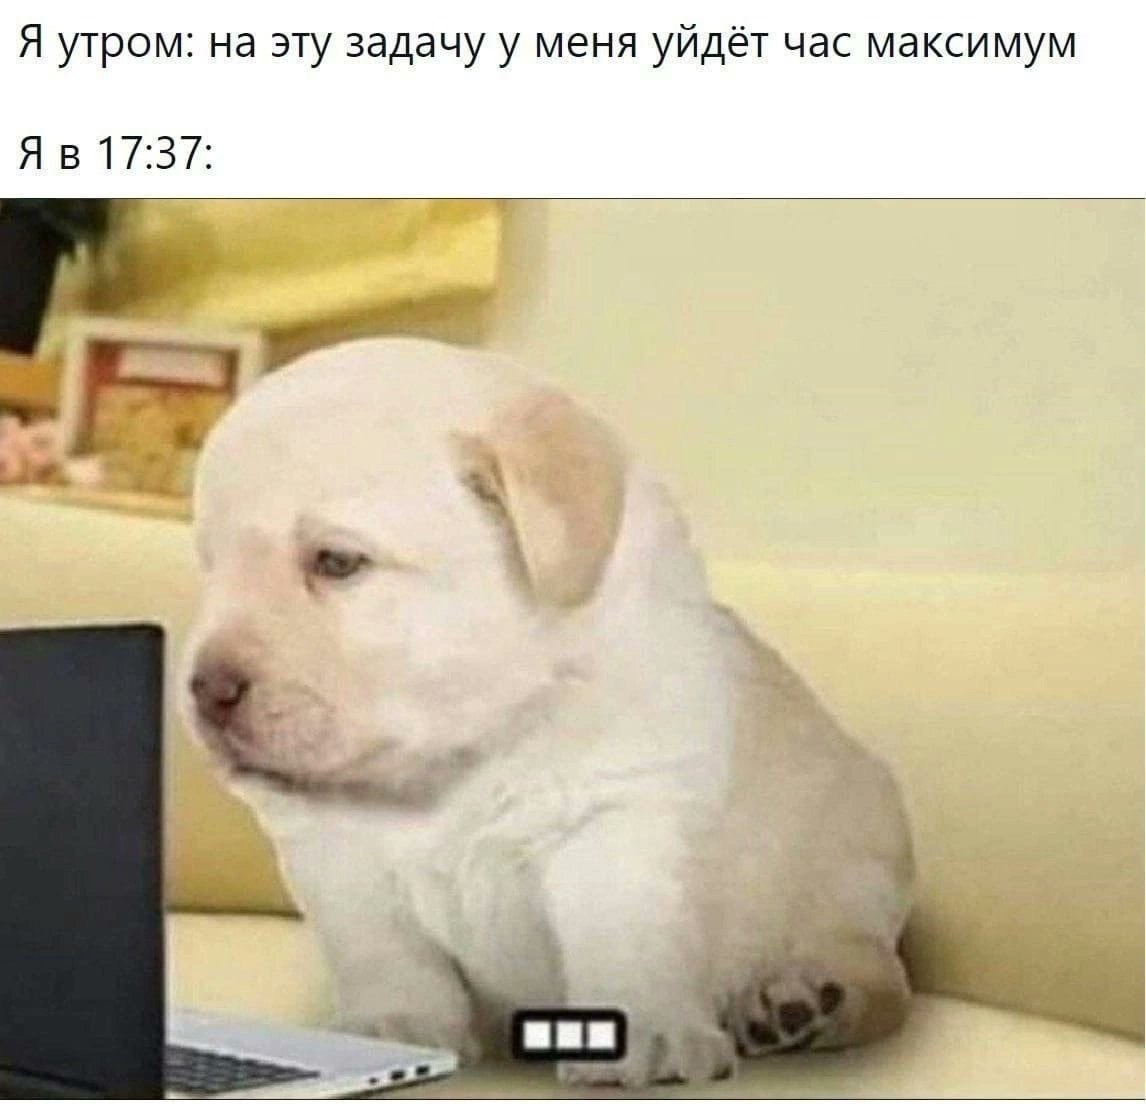